In [1]:
import time
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.tools.jupyter import *
from qiskit.providers.jobstatus import JobStatus, JOB_FINAL_STATES
# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer

In [2]:
IBMQ.load_accounts()
IBMQ.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx4') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx2') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(ibm-q, open, main)>]

In [3]:
backend = IBMQ.backends(name='ibmqx4')[0]
print("The backend is " + backend.name())
simulator = Aer.get_backend('qasm_simulator')

The backend is ibmqx4


In [4]:
q = QuantumRegister(5)
c = ClassicalRegister(5)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.h(q[4])
qc.measure(q, c)

In [5]:
start_time = time.time()

# IBMQx4

In [6]:
job_exp = execute(qc, backend=backend, initial_layout=[0, 1, 2, 3, 4], shots=8192)

start_time = time.time()
job_status = job_exp.status()
while job_status not in JOB_FINAL_STATES:
    print(f'Status @ {time.time()-start_time:0.0f} s: {job_status.name},'
          f' est. queue position: {job_exp.queue_position()}')
    time.sleep(10)
job_status = job_exp.status()

In [7]:
counts = job_exp.result().get_counts(qc)
print(counts)

{'10100': 311, '01110': 250, '00011': 171, '01101': 278, '00000': 314, '11010': 183, '11101': 263, '00111': 211, '00101': 283, '00110': 245, '01111': 202, '10110': 221, '10101': 250, '11000': 307, '01011': 209, '00001': 306, '11011': 177, '01001': 303, '01100': 317, '00010': 233, '00100': 353, '01000': 370, '11110': 223, '10000': 324, '10010': 246, '11100': 296, '10111': 184, '10001': 290, '01010': 223, '11111': 209, '11001': 285, '10011': 155}


In [30]:
qb = {}
qb1 = sum((v for k, v in counts.items() if k.endswith('0')), 0)
qb2 = sum((v for k, v in counts.items() if k.endswith('1')), 0)
qb3 = sum((v for k, v in counts.items() if k.endswith(('00' , '01'))), 0)
qb4 = sum((v for k, v in counts.items() if k.endswith(('10' , '11'))), 0)
qb5 = sum((v for k, v in counts.items() if k.endswith(('000' , '001' , '010' , '011'))), 0)
qb6 = sum((v for k, v in counts.items() if k.endswith(('100' , '101' , '110' , '111'))), 0)
qb7 = sum((v for k, v in counts.items() if k.startswith(('00' , '10'))), 0)
qb8 = sum((v for k, v in counts.items() if k.startswith(('01' , '11'))), 0)
qb9 = sum((v for k, v in counts.items() if k.startswith('0')), 0)
qb10 = sum((v for k, v in counts.items() if k.startswith('1')), 0)

qb.update([('qb00', qb1),
           ('qb01', qb2),
           ('qb10', qb3),
           ('qb11', qb4),
           ('qb20', qb5), 
           ('qb21', qb6),
           ('qb30', qb7), 
           ('qb31', qb8),
           ('qb40', qb9), 
           ('qb41', qb10)])

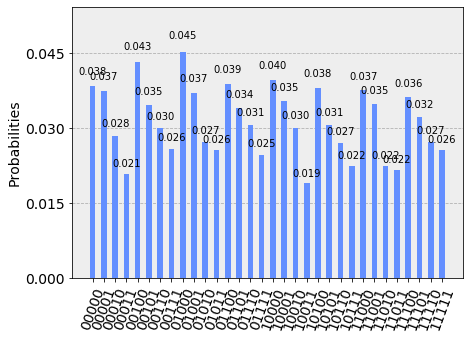

In [8]:
plot_histogram(counts) #raw data

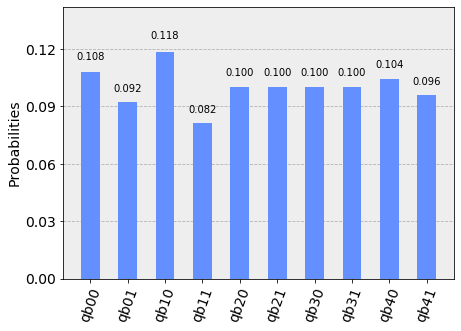

In [31]:
plot_histogram(qb)

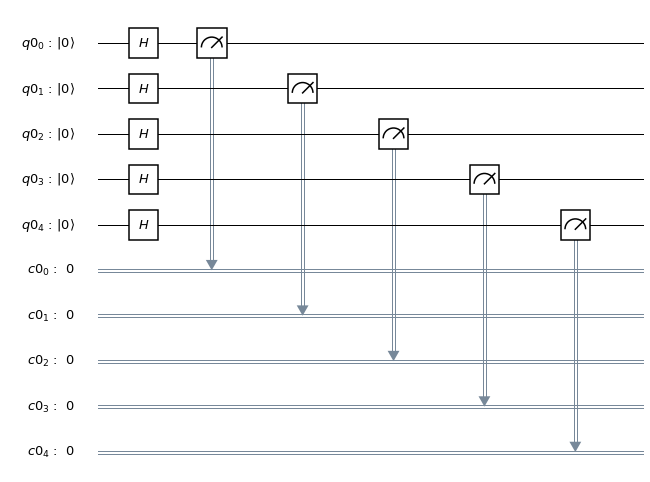

In [9]:
qc.draw(output='mpl')

# Simulation

In [23]:
job_sim = execute(qc, backend=simulator, shots=8192)
counts_sim = job_sim.result().get_counts(qc)

In [24]:
print("\nTotal count for simulator:",counts_sim)


Total count for simulator: {'01111': 249, '10100': 254, '00011': 233, '00000': 266, '11101': 252, '00101': 253, '00111': 264, '00110': 264, '01010': 276, '11010': 243, '10110': 258, '10101': 271, '01110': 258, '11000': 246, '00001': 247, '01001': 260, '00010': 242, '01100': 256, '00100': 242, '10000': 261, '01000': 270, '01101': 286, '10010': 264, '11111': 259, '10111': 237, '10001': 237, '11011': 260, '11110': 253, '11100': 274, '01011': 263, '10011': 264, '11001': 230}


In [28]:
qbs = {}
qbs1 = sum((v for k, v in counts_sim.items() if k.endswith('0')), 0)
qbs2 = sum((v for k, v in counts_sim.items() if k.endswith('1')), 0)
qbs3 = sum((v for k, v in counts_sim.items() if k.endswith(('00' , '01'))), 0)
qbs4 = sum((v for k, v in counts_sim.items() if k.endswith(('10' , '11'))), 0)
qbs5 = sum((v for k, v in counts_sim.items() if k.endswith(('000' , '001' , '010' , '011'))), 0)
qbs6 = sum((v for k, v in counts_sim.items() if k.endswith(('100' , '101' , '110' , '111'))), 0)
qbs7 = sum((v for k, v in counts_sim.items() if k.startswith(('00' , '10'))), 0)
qbs8 = sum((v for k, v in counts_sim.items() if k.startswith(('01' , '11'))), 0)
qbs9 = sum((v for k, v in counts_sim.items() if k.startswith('0')), 0)
qbs10 = sum((v for k, v in counts_sim.items() if k.startswith('1')), 0)

qbs.update([('qb00', qbs1),
           ('qb01', qbs2),
           ('qb10', qbs3),
           ('qb11', qbs4),
           ('qb20', qbs5), 
           ('qb21', qbs6),
           ('qb30', qbs7), 
           ('qb31', qbs8),
           ('qb40', qbs9), 
           ('qb41', qbs10)])

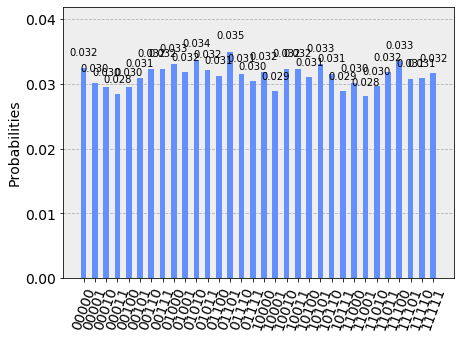

In [26]:
plot_histogram(counts_sim)

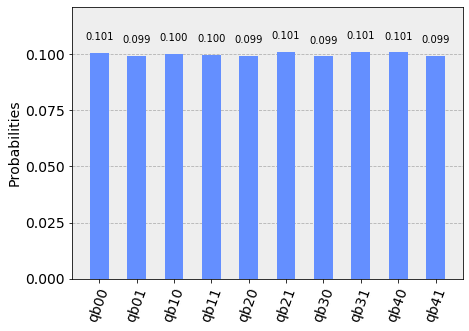

In [29]:
plot_histogram(qbs)

In [13]:
print("--- %s seconds ---" % round(time.time() - start_time), 2)

--- 76 seconds --- 2
